<a href="https://colab.research.google.com/github/Naaaaaana/DWBI_Groupcw2/blob/main/DWBIGCW_datacleaning_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/bank_transactions.csv')

In [3]:
df.shape

(32852, 9)

In [4]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,140
CustGender,23
CustLocation,3
CustAccountBalance,37
TransactionDate,1
TransactionTime,1
TransactionAmount (INR),1


In [5]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.000000
CustomerID,0.000000
CustomerDOB,0.426154
CustGender,0.070011
CustLocation,0.009132
CustAccountBalance,0.112626
TransactionDate,0.003044
TransactionTime,0.003044
TransactionAmount (INR),0.003044


In [6]:
df_Fact1 = df

In [7]:
df_Fact1 = df_Fact1.dropna()

In [8]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(32651, 9)

In [10]:
from datetime import datetime

In [11]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-11-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-11-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-11-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [12]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712.0,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714.0,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940.0,676.00,-47
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806.0,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537.0,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825.0,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446.0,289.11,41


In [13]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,object
TransactionTime,float64
TransactionAmount (INR),float64
Age,int32


In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,32651.00
mean,41.63
std,53.38
min,-49.00
25%,33.00
50%,37.00
75%,42.00
max,225.00


In [15]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] < 1) | (df_Fact1['Age'] > 100)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 1].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 5401
transaction_error_amount: 188


In [16]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['Age'] >= 1) & (df_Fact1['Age'] <= 100) & (df_Fact1['TransactionAmount (INR)'] >= 1)]

In [17]:
df_Fact1_clean.shape

(27213, 10)

In [18]:
df_Fact1_clean['Age'].describe()

,Age
count,27213.00
mean,37.79
std,5.23
min,4.00
25%,34.00
50%,37.00
75%,41.00
max,50.00


In [19]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,27213.00
mean,1330.76
std,6108.13
min,1.00
25%,130.00
50%,360.00
75%,1000.00
max,455122.00


In [20]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207.00,25.00,31
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712.00,459.00,29
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156.00,1762.50,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806.00,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537.00,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825.00,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446.00,289.11,41
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,204133.00,259.00,43
11,T12,C6939838,1988-07-07,M,GUNTUR,14613.46,2/8/16,205108.00,202.00,37
12,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,203834.00,12300.00,47


In [21]:
#convert TransectionDate to datetime type
df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')

<ipython-input-21-8cc306abbf17>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')
<ipython-input-21-8cc306abbf17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')


In [22]:
#filter Transectiondate error
future_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] >= '2025-01-01']
pre_birth_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB']]

In [23]:
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 0
the transactiondate before birth： 4


In [24]:
#Drop transactiondate error
invalid_transactions = (df_Fact1_clean['TransactionDate'] >= '2025-01-01') | \
                       (df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB'])

df_Fact1_clean1 = df_Fact1_clean[~invalid_transactions]

In [25]:
df_Fact1_clean.shape

(27213, 10)

In [26]:
#Final data shape
df_Fact1_clean1.shape

(27209, 10)

In [27]:
df_Fact1_clean1['CustLocation'].describe()

,CustLocation
count,27209
unique,1950
top,MUMBAI
freq,2752


In [28]:
top_30 = df_Fact1_clean1['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
MUMBAI           2752
BANGALORE        2145
NEW DELHI        2047
DELHI            1930
GURGAON          1886
NOIDA             877
CHENNAI           680
PUNE              645
THANE             616
HYDERABAD         577
KOLKATA           512
GHAZIABAD         414
NAVI MUMBAI       325
AHMEDABAD         321
FARIDABAD         311
JAIPUR            299
CHANDIGARH        228
LUCKNOW           213
MOHALI            154
SURAT             137
NASHIK            136
LUDHIANA          126
VISAKHAPATNAM     109
INDORE            106
AMRITSAR          105
AGRA              102
VADODARA          101
DEHRADUN           97
NAGPUR             95
KANPUR             94
Name: count, dtype: int64


In [29]:
top_100 = df_Fact1_clean1['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI          2752
BANGALORE       2145
NEW DELHI       2047
DELHI           1930
GURGAON         1886
                ... 
KANPUR NAGAR      27
YAMUNANAGAR       27
VIJAYAWADA        26
JAMMU             26
BATHINDA          26
Name: count, Length: 100, dtype: int64


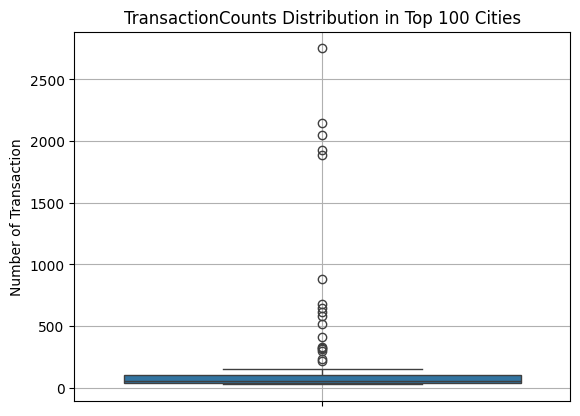

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

In [31]:
total_transactions = top_100_df['TransactionCounts'].sum()
print(total_transactions)

21407


In [32]:
df_Fact1_clean2 = df_Fact1_clean1.copy()

In [33]:
#Unify the same city name
df_Fact1_clean2['CustLocation'] = df_Fact1_clean2['CustLocation'].replace('BENGALURU', 'BANGALORE')

In [34]:
top_100 = df_Fact1_clean2['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI          2752
BANGALORE       2191
NEW DELHI       2047
DELHI           1930
GURGAON         1886
                ... 
KANPUR NAGAR      27
HARIDWAR          26
JAMMU             26
BATHINDA          26
VIJAYAWADA        26
Name: count, Length: 100, dtype: int64


In [35]:
#Display the 5 top Locations
import sqlite3
conn = sqlite3.connect('transactions.db')
df_Fact1_clean2.to_sql('transactions', conn, if_exists='replace', index=False)

27209

In [36]:
query = """
SELECT CustLocation, COUNT(*) AS transaction_count
FROM transactions
GROUP BY CustLocation
ORDER BY transaction_count DESC
LIMIT 5
"""

top_locations = pd.read_sql_query(query, conn)
print(top_locations)

  CustLocation  transaction_count
0       MUMBAI               2752
1    BANGALORE               2191
2    NEW DELHI               2047
3        DELHI               1930
4      GURGAON               1886
